## Impelementasi K-Means Clustering pada bioata laut (warna ikan)

### Preparring Libarary yang dibituhkan

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import platform
import psutil
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### Menggunakan Elbow Method Menggunakan Elbow Method untuk Menentukan Jumlah Cluster Optimal

In [12]:
# Membaca gambar dan mengubah ke format RGB
image_path = "images/aethaloperca_rogaa_11.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Ubah gambar menjadi kumpulan piksel (flatten)
pixels = image.reshape(-1, 3)
height, width, channels = image.shape

print(f"Bentuk Awal (3D) → ({height}, {width}, {channels})")

print(f"{height} = tinggi gambar")
print(f"{width} = lebar gambar")
print(f"{channels} = jumlah kanal warna (RGB)")
print(f"Bentuk Akhir (2D) → {pixels.shape}")


Bentuk Awal (3D) → (432, 650, 3)
432 = tinggi gambar
650 = lebar gambar
3 = jumlah kanal warna (RGB)
Bentuk Akhir (2D) → (280800, 3)


In [13]:
# Hitung inertia untuk berbagai nilai K
max_k = 10  # Batas atas jumlah cluster
inertia = []
k_values = range(1, max_k + 1)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(pixels)
    inertia.append(kmeans.inertia_)
    print(f"K = {k}, Inertia = {kmeans.inertia_:.2f}")

K = 1, Inertia = 866037899.82
K = 2, Inertia = 427127533.45
K = 3, Inertia = 283660527.88
K = 4, Inertia = 201961651.82
K = 5, Inertia = 140273876.40
K = 6, Inertia = 116479413.24
K = 7, Inertia = 93609222.28
K = 8, Inertia = 81971134.45
K = 9, Inertia = 73143205.75
K = 10, Inertia = 66512469.12


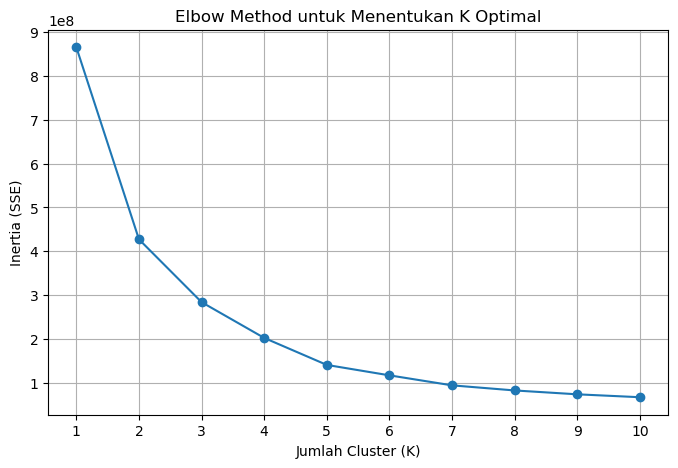

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xticks(k_values)
plt.grid()
plt.show()

In [15]:
# Melakukan K-Means Clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels = kmeans.fit_predict(pixels)

# Buat gambar baru berdasarkan warna cluster
recolored_pixels = kmeans.cluster_centers_[labels].reshape(image.shape).astype(int)

In [16]:
# Menghitung Persentase Warna di Setiap Cluster
unique, counts = np.unique(labels, return_counts=True)
color_distribution = counts / counts.sum()

# Mengonversi Warna Dominan ke Format Matplotlib
dominant_colors = np.round(kmeans.cluster_centers_).astype(int) / 255


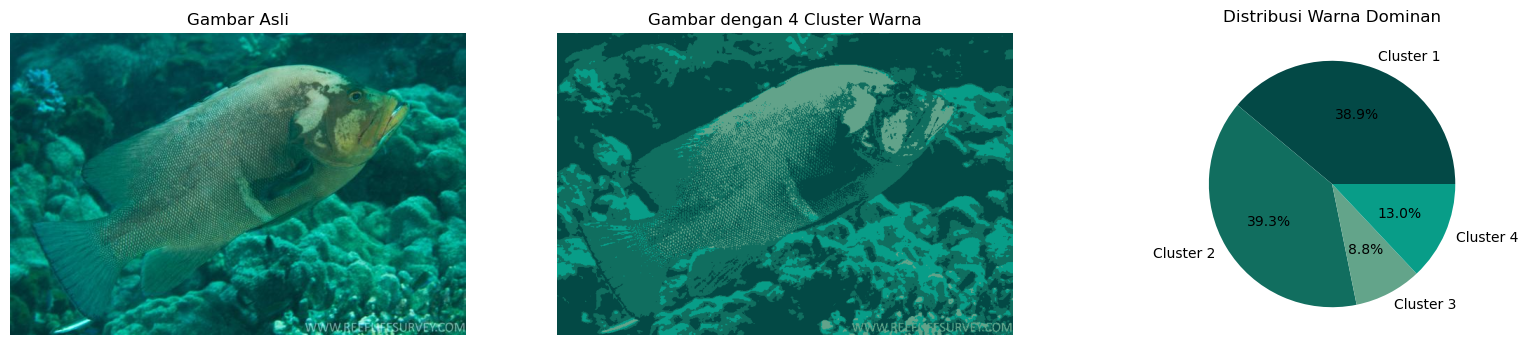

In [17]:
# Menghitung Persentase Warna di Setiap Cluster
unique, counts = np.unique(labels, return_counts=True)
color_distribution = counts / counts.sum()

# Mengonversi Warna Dominan ke Format Matplotlib
dominant_colors = np.round(kmeans.cluster_centers_).astype(int) / 255


# Gambar Asli
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

axes[0].imshow(image)
axes[0].set_title("Gambar Asli")
axes[0].axis("off")

# Gambar Hasil Clustering
axes[1].imshow(recolored_pixels)
axes[1].set_title(f"Gambar dengan 4 Cluster Warna")
axes[1].axis("off")

# Pie Chart Warna Dominan
axes[2].pie(color_distribution, labels=[f"Cluster {i+1}" for i in unique], colors=dominant_colors, autopct='%1.1f%%')
axes[2].set_title("Distribusi Warna Dominan")

plt.show()

Simulasi Waran Angular Distance

c:\Users\EZZRA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


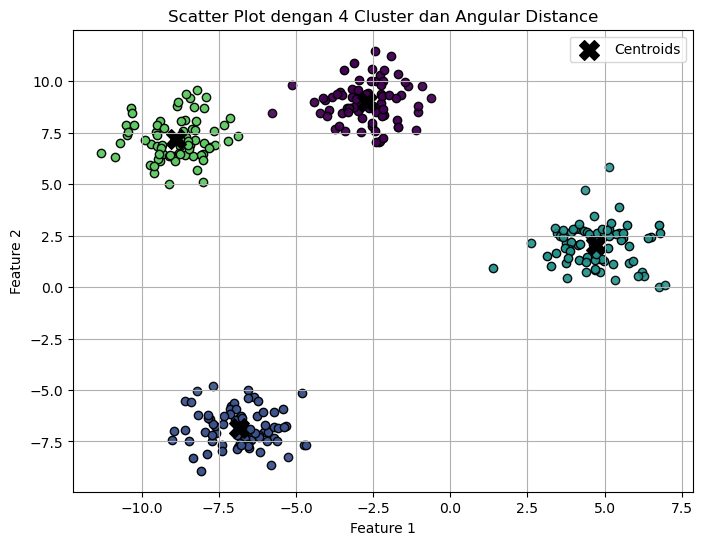

In [18]:

# Fungsi untuk menghitung angular distance
def angular_distance(v1, v2):
    v1 = v1 / np.linalg.norm(v1)
    v2 = v2 / np.linalg.norm(v2)
    dot_product = np.dot(v1, v2)
    dot_product = np.clip(dot_product, -1.0, 1.0)
    return np.arccos(dot_product)

# Simulasi data untuk clustering
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Melakukan KMeans clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Visualisasi scatter plot
plt.figure(figsize=(8, 6))

# Tentukan warna berdasarkan cluster
colors = plt.cm.viridis(labels / k) 

# Hitung dan plot angular distance untuk setiap titik
for i in range(X.shape[0]):
    # Ambil centroid terdekat untuk tiap titik
    closest_centroid = centroids[labels[i]]
    
    # Hitung angular distance
    angle_distance = angular_distance(X[i], closest_centroid)
    
    # Tentukan alpha berdasarkan angular distance (lebih besar angular distance, lebih transparan)
    alpha = angle_distance / np.pi  # Normalisasi ke rentang [0,1]
    
    # Plot titik dengan warna berdasarkan cluster dan alpha berdasarkan angular distance
    plt.scatter(X[i, 0], X[i, 1], color=colors[i], alpha=1-alpha, edgecolors='k')

# Plot centroids dengan warna hitam dan tanda 'X'
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=200, marker='X', label='Centroids')

plt.title(f"Scatter Plot dengan {k} Cluster dan Angular Distance")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


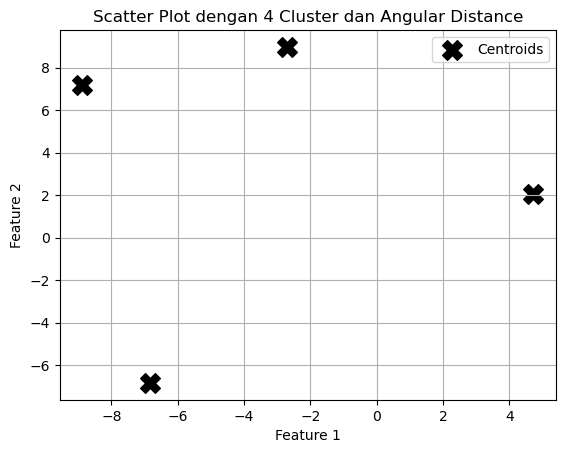

In [19]:
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=200, marker='X', label='Centroids')
plt.title(f"Scatter Plot dengan {k} Cluster dan Angular Distance")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
def get_device_info():
    return {
        "OS": platform.system(),
        "OS Version": platform.version(),
        "Processor": platform.processor(),
        "RAM": f"{round(psutil.virtual_memory().total / (1024**3), 2)} GB"
    }

def elbow_method(image_path, max_k=10):
    start_time = time.time()
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = image.reshape(-1, 3)
    inertia = []
    k_values = range(1, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(pixels)
        inertia.append(kmeans.inertia_)

    exec_time = round(time.time() - start_time, 2)


    print("\n--- Informasi Eksekusi ---")
    print(f"Resolusi Gambar: {image.shape[1]}x{image.shape[0]} px")
    print(f"Bentuk gambar setelah diratakan: {pixels.shape}")
    print(f"Waktu Eksekusi Elbow Method: {exec_time} detik")

def kmeans_clustering(image_path, k=4):
    start_time = time.time()
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(pixels)
    recolored_pixels = kmeans.cluster_centers_[labels].reshape(image.shape).astype(int)
    exec_time = round(time.time() - start_time, 2)


    print("\n--- Informasi Eksekusi ---")
    print(f"Resolusi Gambar: {image.shape[1]}x{image.shape[0]} px")
    print(f"Bentuk gambar setelah diratakan: {pixels.shape}")
    print(f"Bentuk gambar hasil clustering: {recolored_pixels.shape}")
    print(f"Waktu Eksekusi K-Means: {exec_time} detik")

image_path = "images/aethaloperca_rogaa_11.jpg"
elbow_method(image_path, max_k=10)
kmeans_clustering(image_path, k=4)

device_info = get_device_info()
print("\n--- Informasi Perangkat ---")
for key, value in device_info.items():
    print(f"{key}: {value}")



--- Informasi Eksekusi ---
Resolusi Gambar: 650x432 px
Bentuk gambar setelah diratakan: (280800, 3)
Waktu Eksekusi Elbow Method: 15.83 detik

--- Informasi Eksekusi ---
Resolusi Gambar: 650x432 px
Bentuk gambar setelah diratakan: (280800, 3)
Bentuk gambar hasil clustering: (432, 650, 3)
Waktu Eksekusi K-Means: 1.47 detik

--- Informasi Perangkat ---
OS: Windows
OS Version: 10.0.22631
Processor: Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
RAM: 31.78 GB
